# Exploratory Data Analysis (EDA)

## Step 1: Loading the Cleaned Data
We will begin by loading the cleaned dataset that we saved earlier. This will allow us to start the exploratory data analysis on the preprocessed data.


In [4]:
# Import necessary libraries
import pandas as pd

# Load the cleaned dataset again (ensure the path is correct)
data_path = r'C:\Users\Administrator\Desktop\Data Analytics\Portfolio project\New folder\Algerian_Forest_Fires_Classification\data\processed\cleaned_algerian_forest_fires.csv'
df = pd.read_csv(data_path)

# Display the first few rows to confirm the data is loaded
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## Step 2: Basic Data Overview
Let’s take a quick look at the dataset’s structure, including the number of rows and columns, and get summary statistics for the numerical features. This will help us understand the basic characteristics of the data.


In [6]:
# Check the shape of the dataset (number of rows and columns)
print(f"Dataset Shape: {df.shape}")

# Get summary statistics of numerical columns
df.describe()


Dataset Shape: (243, 15)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


## Step 3: Check for Class Imbalance
We will examine the distribution of the target variable (`Classes`) to check for class imbalance. Class imbalance is an important consideration when building classification models.


In [3]:
# Check the distribution of the target variable 'Classes' (Fire vs. No Fire)
class_distribution = df['Classes'].value_counts()
class_distribution


Classes
fire        137
not fire    106
Name: count, dtype: int64

## Step 4: Visualizing the Data
Let’s visualize the data to better understand the distributions of key features and their relationships with the target variable. We'll use histograms, box plots, and correlation heatmaps.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_21628\1334714566.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Classes', data=df, palette='Set1')


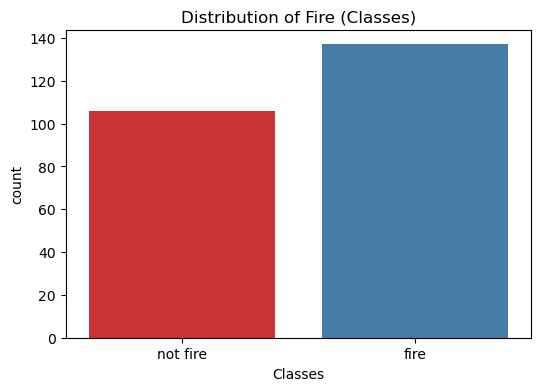

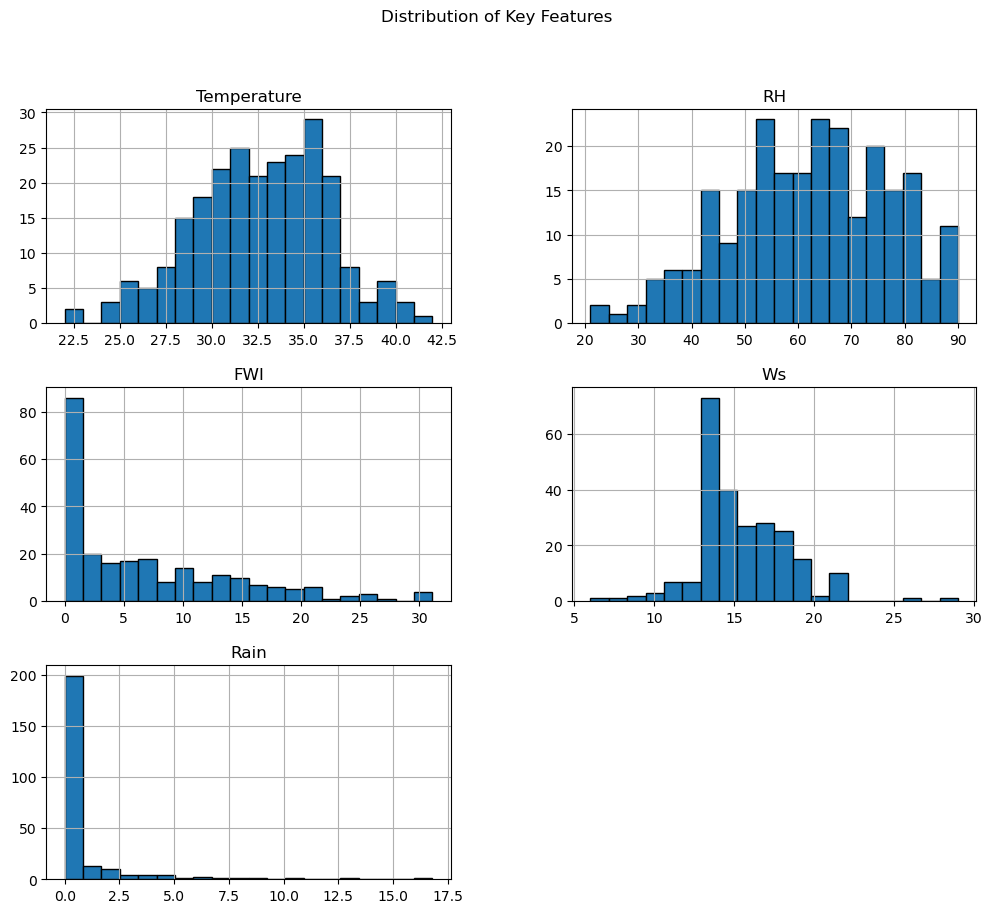

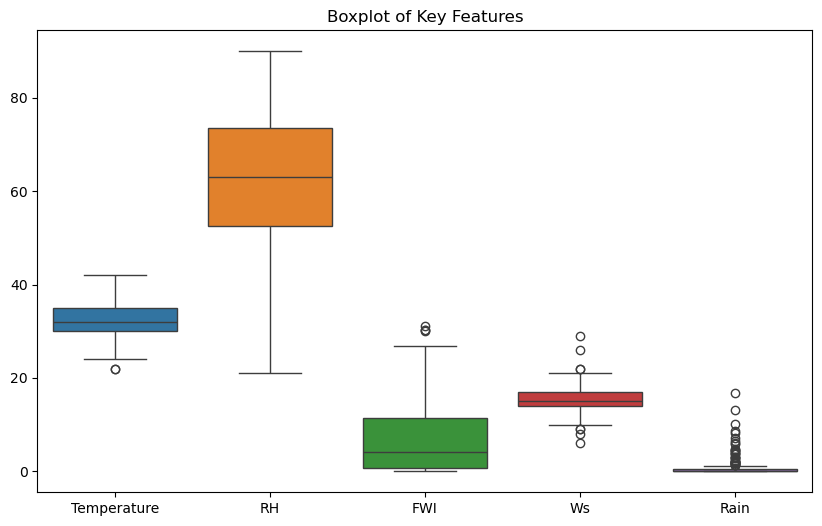

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable 'Classes' (Fire vs. No Fire)
plt.figure(figsize=(6, 4))
sns.countplot(x='Classes', data=df, palette='Set1')
plt.title('Distribution of Fire (Classes)')
plt.show()

# Plot distributions for key features (e.g., Temperature, RH, FWI)
features = ['Temperature', 'RH', 'FWI', 'Ws', 'Rain']
df[features].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Key Features')
plt.show()

# Box plot to check for outliers in some key features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[features])
plt.title('Boxplot of Key Features')
plt.show()


## Step 5: Correlation Analysis
Now, we will examine the correlations between the numerical features. This will help us understand the relationships between weather variables and how they might influence fire occurrences.


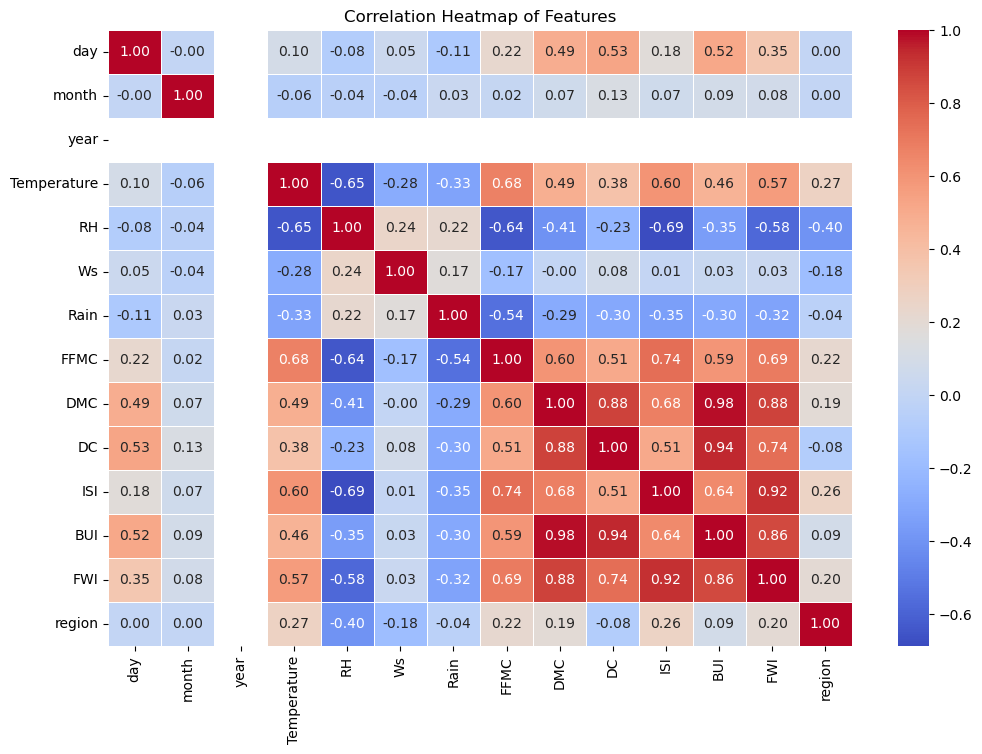

In [7]:
# Import matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap (excluding the target variable 'Classes')
plt.figure(figsize=(12, 8))
numerical_features = df.select_dtypes(include=['float64', 'int64'])  # Select only numerical columns
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


## Step 6: Relationship Between Features and Target Variable
Let's now visualize the relationship between key features (like `Temperature`, `FWI`, etc.) and the target variable (`Classes`). This will help us identify patterns and insights that could be useful for model building.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4080\3650368935.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Classes', y='Temperature', data=df, palette='Set1')


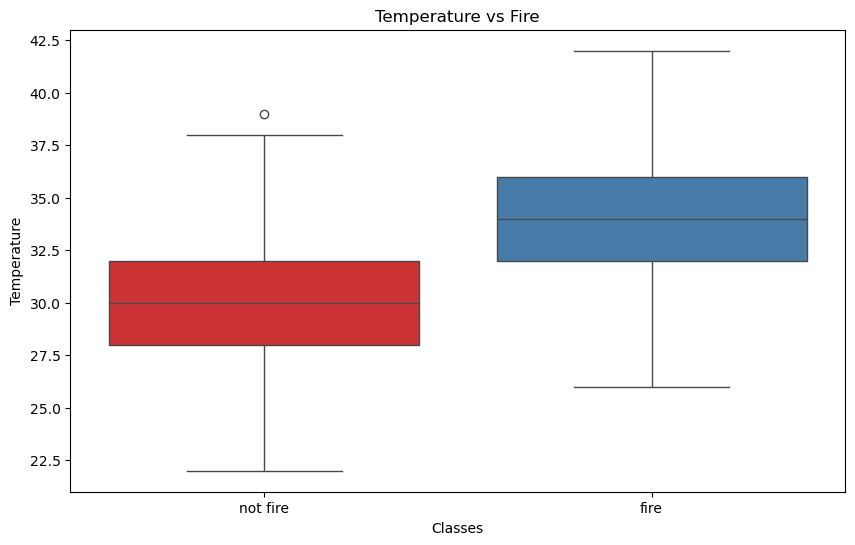

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4080\3650368935.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Classes', y='FWI', data=df, palette='Set1')


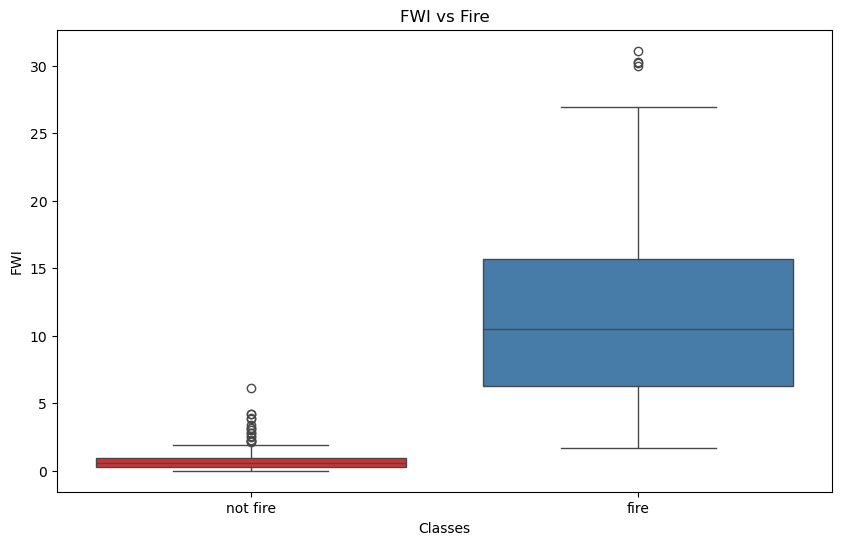

In [8]:
# Plot feature vs. target variable (Fire vs. No Fire)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Classes', y='Temperature', data=df, palette='Set1')
plt.title('Temperature vs Fire')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Classes', y='FWI', data=df, palette='Set1')
plt.title('FWI vs Fire')
plt.show()


## Step 7: Summary of Insights
At this point, we have visualized the data and explored key relationships. Based on the plots and correlation analysis, we can summarize the key insights that will guide our modeling process.


In [ ]:
# In this section, summarize the insights from the plots and correlation analysis.
# Example insights could include:
# - Key features related to fire occurrences (e.g., Temperature, FWI).
# - Whether there is a class imbalance.
# - Any correlations between features that might affect modeling.
